# 卷积层对位置是非常敏感的

池化层（Pooling Layer）是一种常用于卷积神经网络（CNN）中的操作，其主要目的是通过下采样（subsampling）或降采样（downsampling）来减小数据的空间尺寸，从而减少计算量、降低内存消耗，并在一定程度上防止过拟合。池化层不会改变数据的深度（通道数）。

池化层的类型
最大池化（Max Pooling）：从池化窗口中取最大值。最大池化可以提取局部特征中的最强特征响应。

平均池化（Average Pooling）：从池化窗口中取平均值。平均池化则是取窗口中的平均值，更加平滑地降采样特征图。

全局池化（Global Pooling）：池化窗口覆盖整个输入特征图，输出一个单独的值。
池化层的参数


池化窗口大小：窗口的高度和宽度，如 2x2 或 3x3。
步幅（Stride）：窗口在输入特征图上移动的步长。步幅决定了池化输出的大小。
填充（Padding）：是否在输入特征图的边缘填充额外的值，以控制输出特征图的大小。


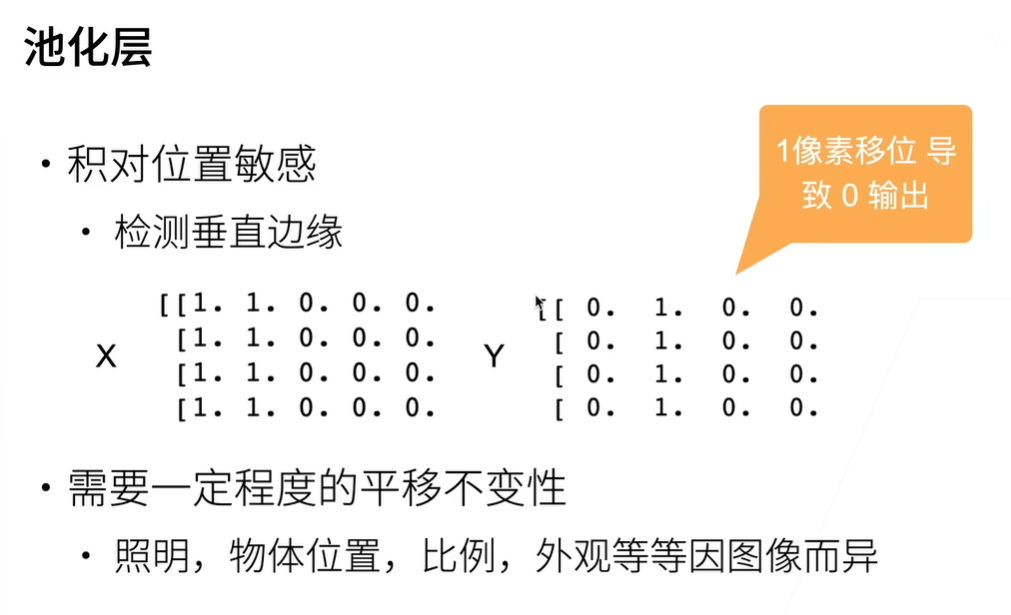

# 最大池化层（注意和卷积核区别）


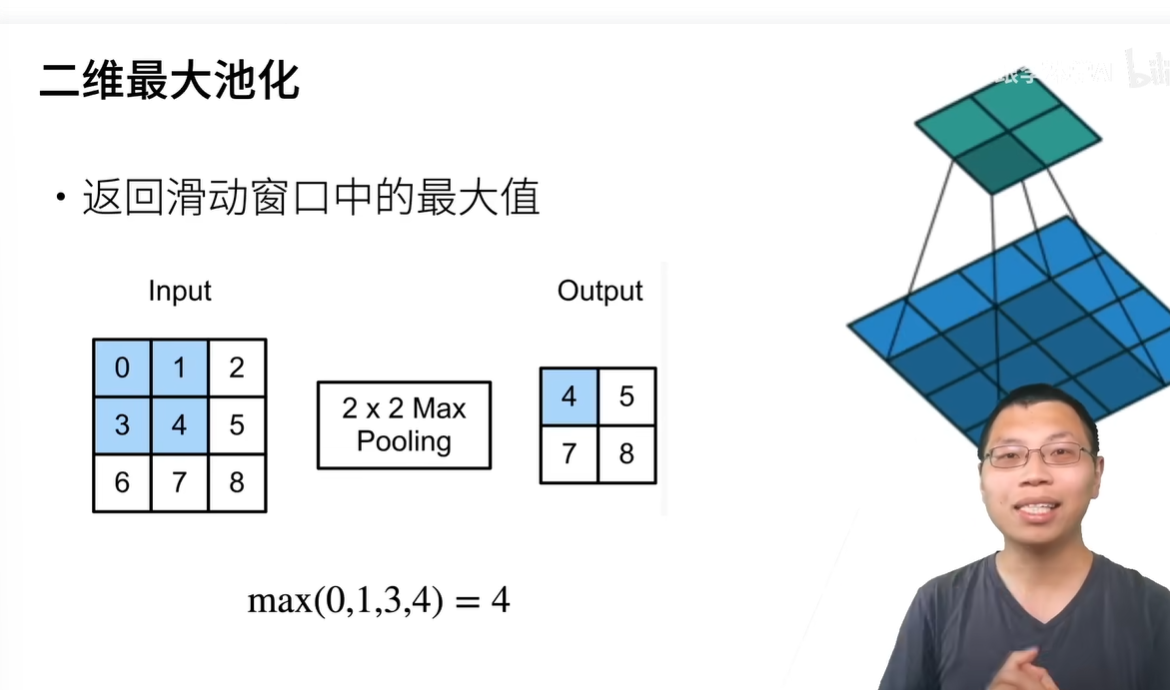


# 最大池化层解决垂直的边缘检测

2x2的最大池化层可以容忍1像素的移位

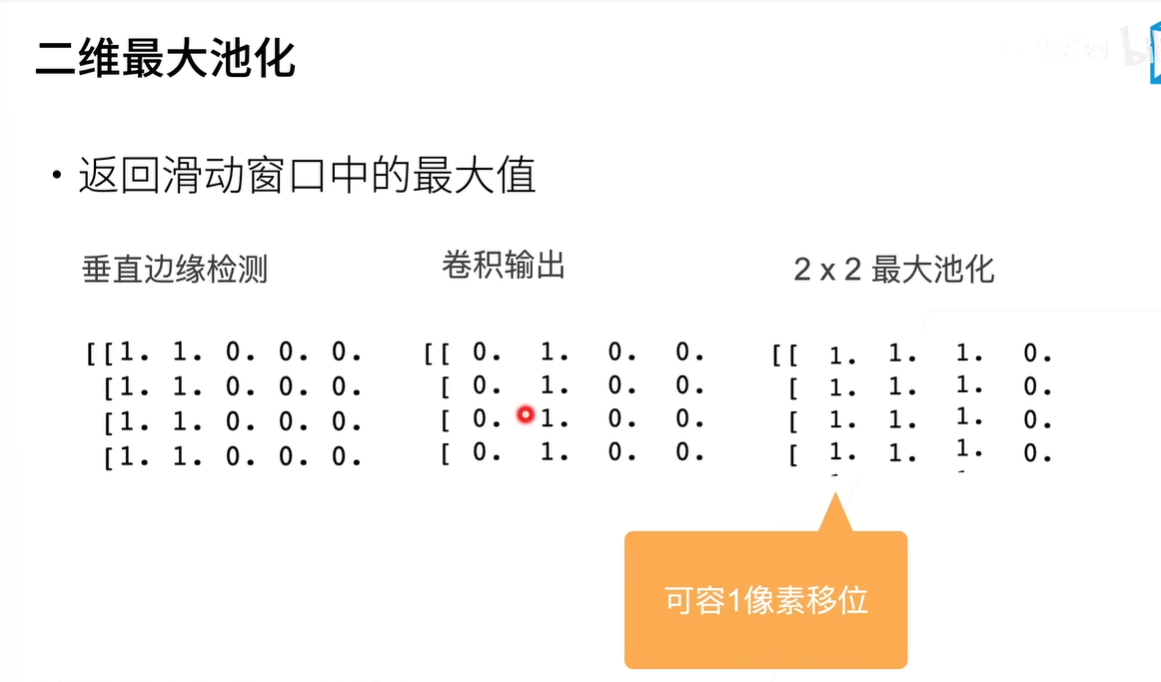

# 池化层的一些超参数


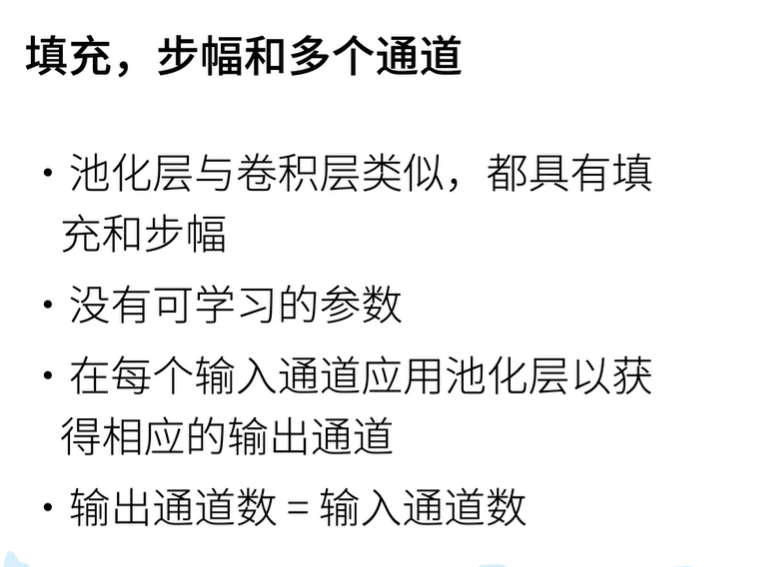

没有可以学习的参数指没有K用于学习

池化层不会改变通道数  要改变通道数用卷积层来做

# 平均池化层

最大池化层是输出一个区域中最强的信号


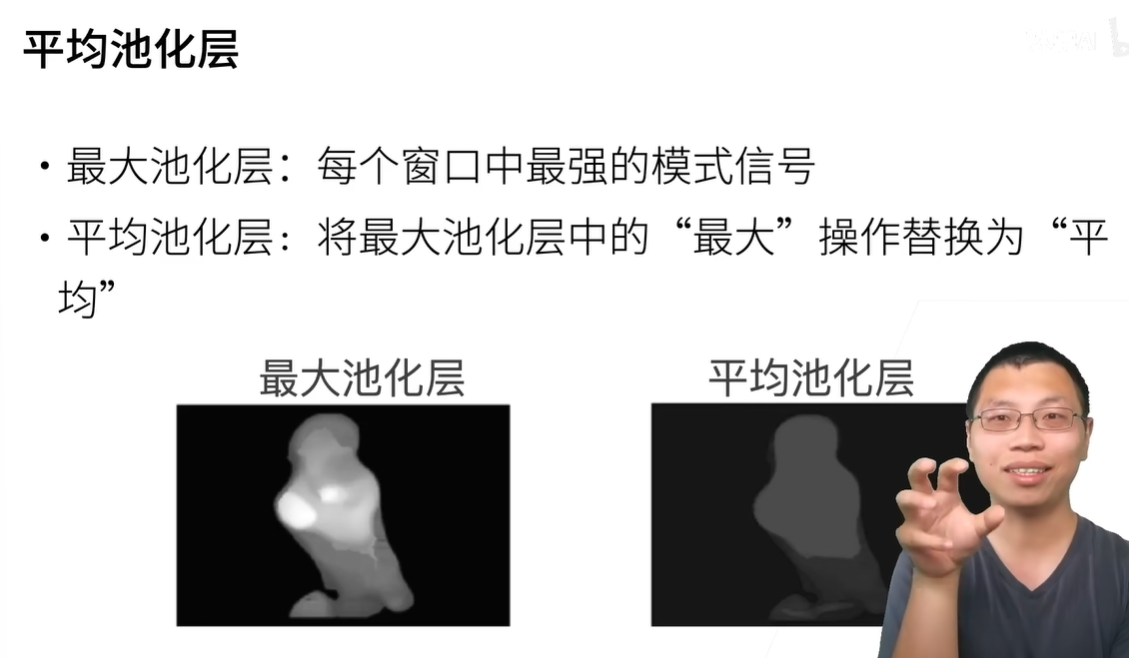

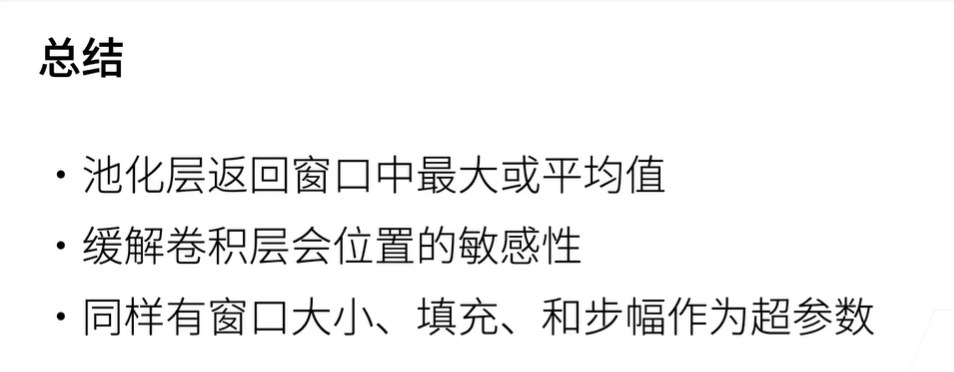

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def pool2d(X, pool_size, mode='max'):
    # 解析池化窗口的高度和宽度
    p_h, p_w = pool_size
    # 创建一个形状为 (X的高度 - 池化窗口高度 + 1, X的宽度 - 池化窗口宽度 + 1) 的张量Y
    # 该张量用于存储池化后的结果
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    # 遍历张量Y的每个元素位置
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            # 如果模式是 'max'，进行最大池化操作
            if mode == 'max':
                # 从X中提取池化窗口大小的子张量，取其最大值并赋值给Y的相应位置
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            # 如果模式是 'avg'，进行平均池化操作
            elif mode == 'avg':
                # 从X中提取池化窗口大小的子张量，取其平均值并赋值给Y的相应位置
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    # 返回池化后的张量Y
    return Y

In [2]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [3]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [4]:
# 创建了一个包含16个元素的张量 X，这些元素从0到15，然后将其重新形状为一个形状为 (1, 1, 4, 4) 的四维张量。
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

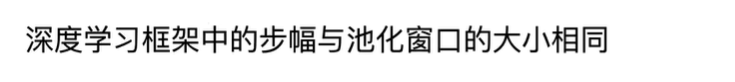

In [5]:
pool2d = nn.MaxPool2d(3)#这是一个3x3大小的max池化层函数
pool2d(X)

tensor([[[[10.]]]])

In [6]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)#3是池化层大小 1是0填充数 2是步长
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [7]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1)) #也可以设定窗口为2x3
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [8]:
X = torch.cat((X, X + 1), 1)
# 该函数可以将多个张量拼接成一个张量
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [9]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])